In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
lead = pd.read_csv('Leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
lead.shape

(9240, 37)

In [4]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Handling Missing Values

In [6]:
# Sorting the missing value percentages
(lead.isnull().sum()*100/len(lead)).sort_values(ascending = False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [7]:
# Since in the dataset a lot of the cells have the value 'Select', we should replace it will null value and check the impact on the above percentages
lead = lead.replace('Select',np.nan)

In [8]:
# Sorting the missing value percentages
(lead.isnull().sum()*100/len(lead)).sort_values(ascending = False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

A significant rise in the percentage of null values are seen for the columns `Lead Profile` and `Where you heard about X education` 

In [9]:
# Lets remove the columns that have more than 40% of missing values
#creating data frame for the missing values percentage in a sorted form
missing_values = pd.DataFrame((lead.isnull().sum()*100/len(lead)).sort_values(ascending = False))
missing_values

,0
How did you hear about X Education,78.463203
Lead Profile,74.188312
Lead Quality,51.590909
Asymmetrique Profile Score,45.649351
Asymmetrique Activity Score,45.649351
Asymmetrique Activity Index,45.649351
Asymmetrique Profile Index,45.649351
City,39.707792
Specialization,36.580087
Tags,36.287879


In [10]:
#Creating a data frame to remove the columns with more than 40% of missing values
cols_to_remove = missing_values[missing_values[0] > 40.0]
cols_to_remove

,0
How did you hear about X Education,78.463203
Lead Profile,74.188312
Lead Quality,51.590909
Asymmetrique Profile Score,45.649351
Asymmetrique Activity Score,45.649351
Asymmetrique Activity Index,45.649351
Asymmetrique Profile Index,45.649351


In [11]:
#dropping the colums from the original data frame lead
lead.drop(cols_to_remove.index,axis = 1,inplace = True)

In [12]:
#checking missing values again
(lead.isnull().sum()*100/len(lead)).sort_values(ascending = False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

### 1. Tags column

<function matplotlib.pyplot.show(close=None, block=None)>

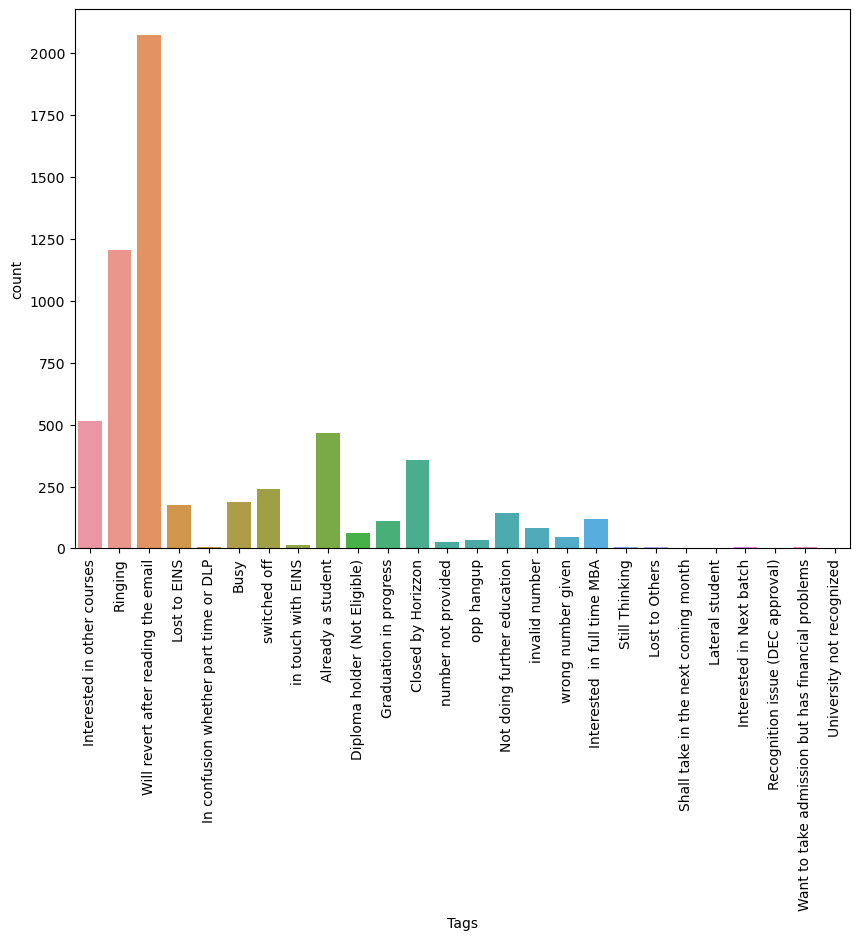

In [13]:
# Visualizing Tags column
plt.figure(figsize=(10,7))
sns.countplot(lead['Tags'])
plt.xticks(rotation=90)
plt.show

In [14]:
# Since Tags is a categorical data, we can impute the missing values with mode
lead.Tags.mode()[0]

'Will revert after reading the email'

In [15]:
lead.Tags.fillna(lead.Tags.mode()[0],inplace = True)

### 2) Specilization Column

<function matplotlib.pyplot.show(close=None, block=None)>

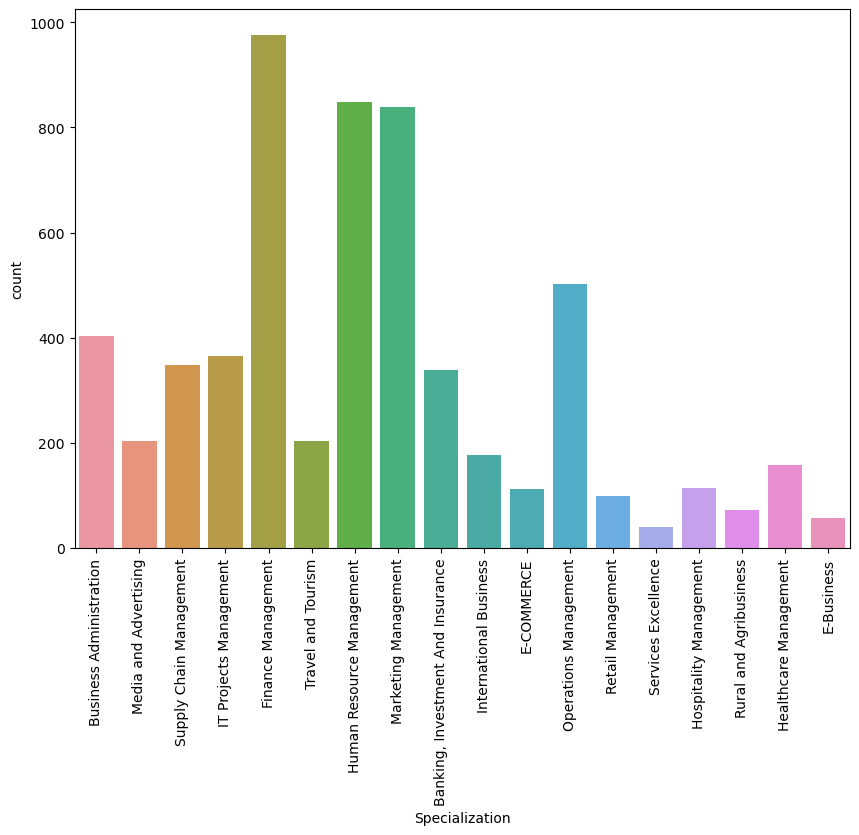

In [16]:
# Visualizing Tags column
plt.figure(figsize=(10,7))
sns.countplot(lead['Specialization'])
plt.xticks(rotation=90)
plt.show

There is 37% missing values present in the Specialization column .It may be possible that the lead may leave this column blank if he may be a student or not having any specialization or his specialization is not there in the options given. So we can create a another category 'Others' for this.

In [17]:
# Creating a separate category called 'Others' for this 
lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Others')

### 3) `What matters more to you while choosing a course` column

(array([0, 1, 2]),
 [Text(0, 0, 'Better Career Prospects'),
  Text(1, 0, 'Flexibility & Convenience'),
  Text(2, 0, 'Other')])

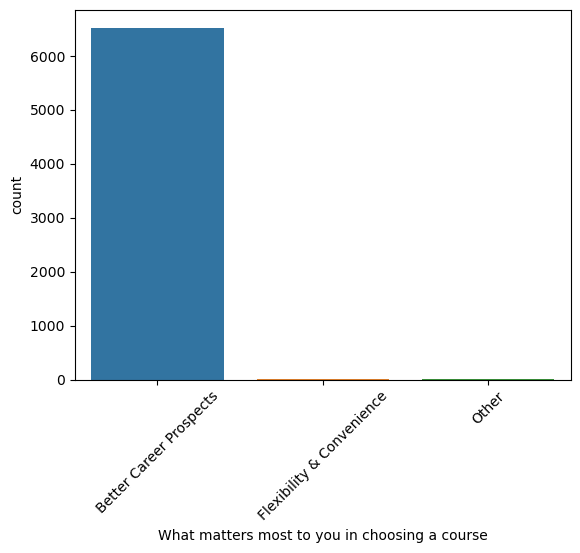

In [18]:
# Visualizing this column
sns.countplot(lead['What matters most to you in choosing a course'])
plt.xticks(rotation=45)

In [19]:
# Finding the percentage of the different categories of this column:
round(lead['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: What matters most to you in choosing a course, dtype: float64

In [20]:
# Since all the values are the same, we can remove this column
# Dropping this column 
lead=lead.drop('What matters most to you in choosing a course',axis=1)

### 3) `What is your current occupation` column


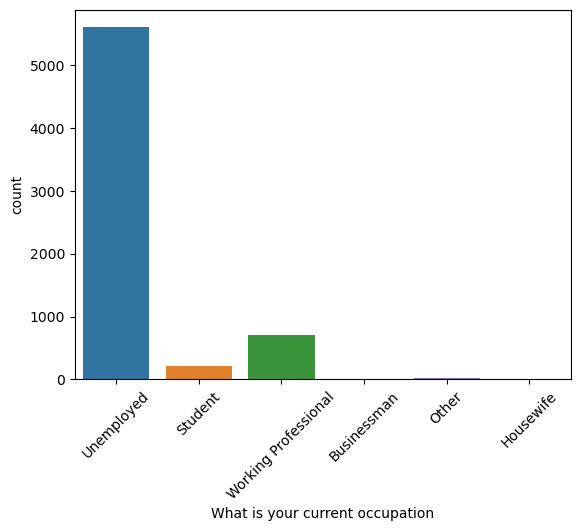

In [21]:
# Visualizing this column
sns.countplot(lead['What is your current occupation'])
plt.xticks(rotation=45)
plt.show()

In [22]:
# Imputing the missing data in the 'What is your current occupation' column with 'Unemployed'
lead['What is your current occupation']=lead['What is your current occupation'].replace(np.nan,'Unemployed')

### 4) Country column

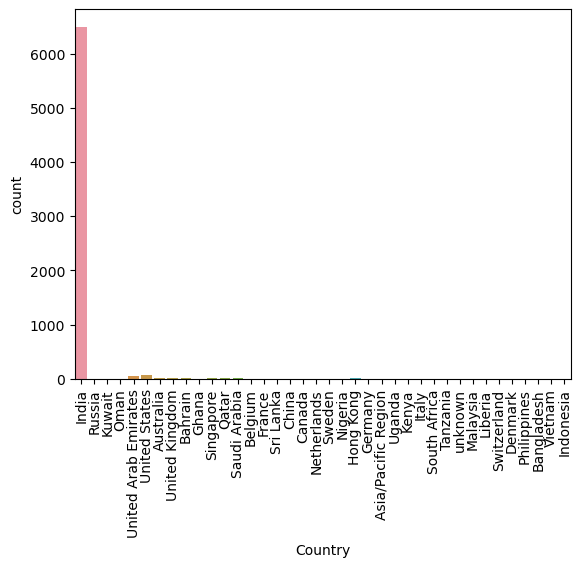

In [23]:
# Visualizing this column
sns.countplot(lead['Country'])
plt.xticks(rotation=90)
plt.show()

In [24]:
# Imputing the missing data in the 'Country' column with 'India'
lead['Country']=lead['Country'].replace(np.nan,'India')

### 5) City Column

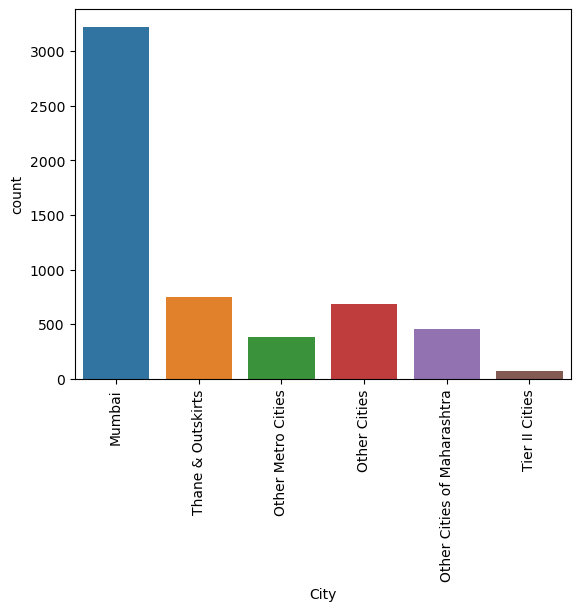

In [25]:
# Visualizing this column
sns.countplot(lead['City'])
plt.xticks(rotation=90)
plt.show()

In [26]:
# Imputing the missing data in the 'City' column with 'Mumbai'
lead['City']=lead['City'].replace(np.nan,'Mumbai')

In [27]:
# Lets now check for the missing values
(lead.isnull().sum()*100/len(lead)).sort_values(ascending = False)

TotalVisits                                 1.482684
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Lead Source                                 0.389610
Prospect ID                                 0.000000
X Education Forums                          0.000000
A free copy of Mastering The Interview      0.000000
I agree to pay the amount through cheque    0.000000
City                                        0.000000
Get updates on DM Content                   0.000000
Update me on Supply Chain Content           0.000000
Tags                                        0.000000
Receive More Updates About Our Courses      0.000000
Through Recommendations                     0.000000
Digital Advertisement                       0.000000
Newspaper                                   0.000000
Search                                      0.000000
Newspaper Article                           0.000000
Magazine                                    0.

In [28]:
# The remaining missing values are less than 2% so we can remove the missing value rows
# Dropping the rows with null values
lead.dropna(inplace = True)

In [29]:
# Lets now check for the missing values
(lead.isnull().sum()*100/len(lead)).sort_values(ascending = False)

Prospect ID                                 0.0
Magazine                                    0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
City                                        0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Tags                                        0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Search                                      0.0
Lead Number                                 0.0
What is your current occupation             0.0
Specialization                              0.0
Country                                     0.0
Last Activity                               0.0
Page Views Per Visit                    

In [30]:
lead.shape

(9074, 29)

We have retained 9074 rows out of 9240 rows which is approximately 98% of data retention.

## Exploratory Data Analysis

### 1. Converted Column

In [31]:
Converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
Converted

37.85541106458012

We have 38% of lead conversion rate

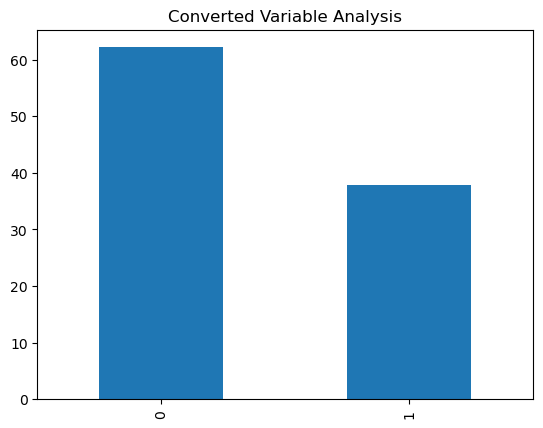

In [35]:
# Analysing Target column
(lead.Converted.value_counts(normalize = True)*100).plot(kind = "bar")
plt.title("Converted Variable Analysis")
plt.show()

We have 38% lead conversion rate

### 2. Lead Origin Column

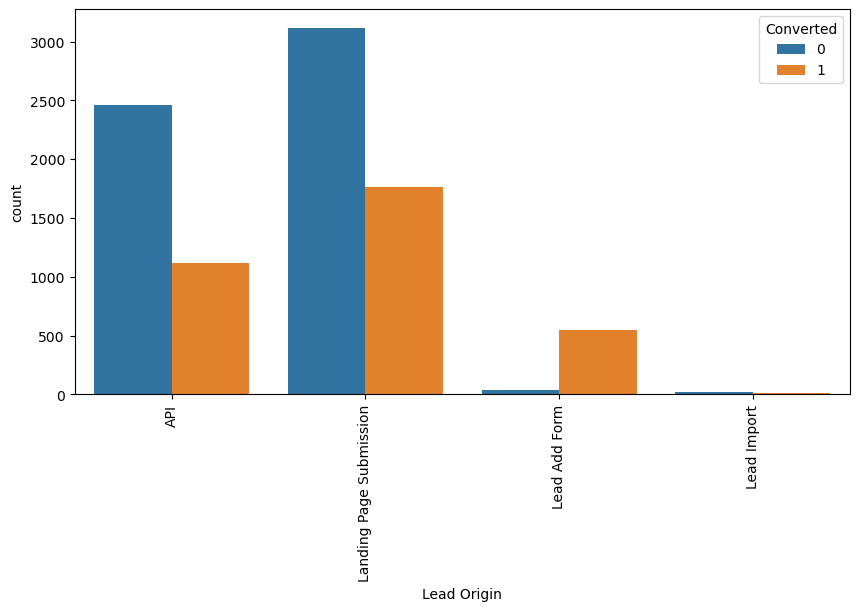

In [39]:
# Lead Origin column Analysis
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

Maximum leads are obtained from `Landing Page Submission` and `API`

### 3. Lead Source

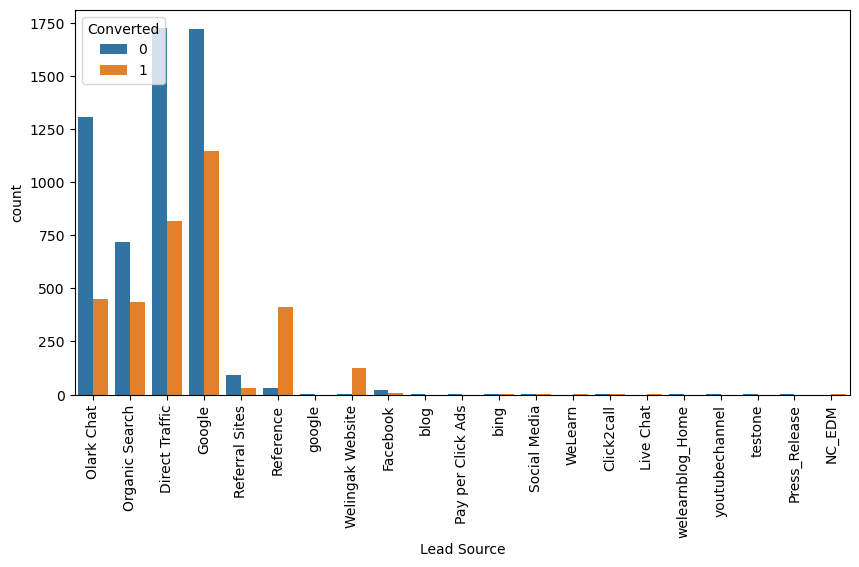

In [41]:
# Lead Source column Analysis
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

1. We notice that google is mentioned twice, so we need to change google to Google
2. A few sources can be aggregated under the name `advertisements` as they fall under that category

In [42]:
# Need to replace 'google' with 'Google'
lead['Lead Source'] = lead['Lead Source'].replace(['google'], 'Google')

In [43]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
lead['Lead Source'] = lead['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Advertisements')

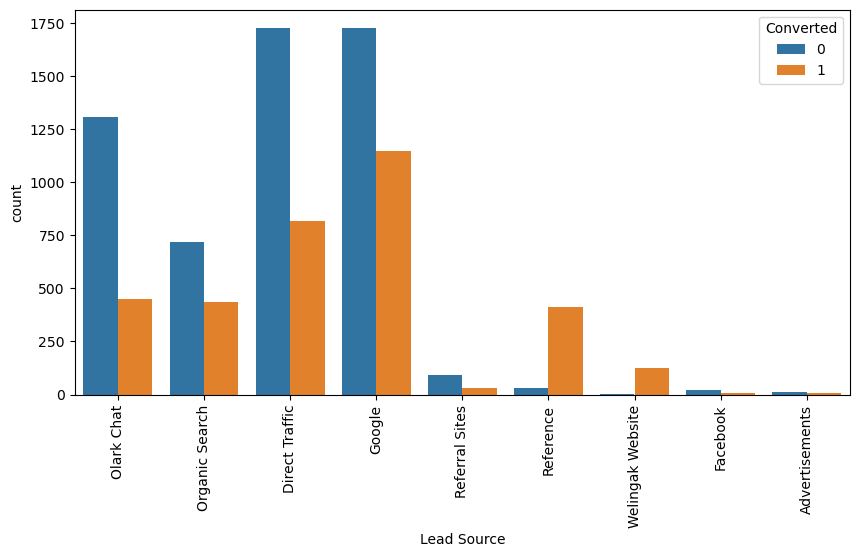

In [45]:
# Analysing the column again with the changes made
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

Observations:
1. Lead conversion is highest from `Google` and `Direct Traffic`
2. With the help of references, there are higher chances of lead conversion
3. Welingak Website has a good lead conversion rate with almost all the leads getting converted

### 4. Magazine Column

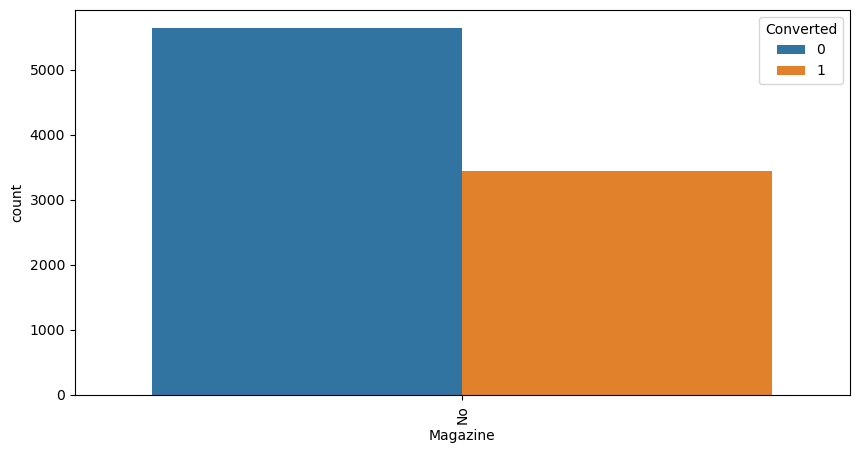

In [46]:
#Analysing Magazine column
plt.figure(figsize=(10,5))
sns.countplot(x = "Magazine", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

All the values are `No`. No inferences can be made

### 5. A free copy of Mastering The Interview Column

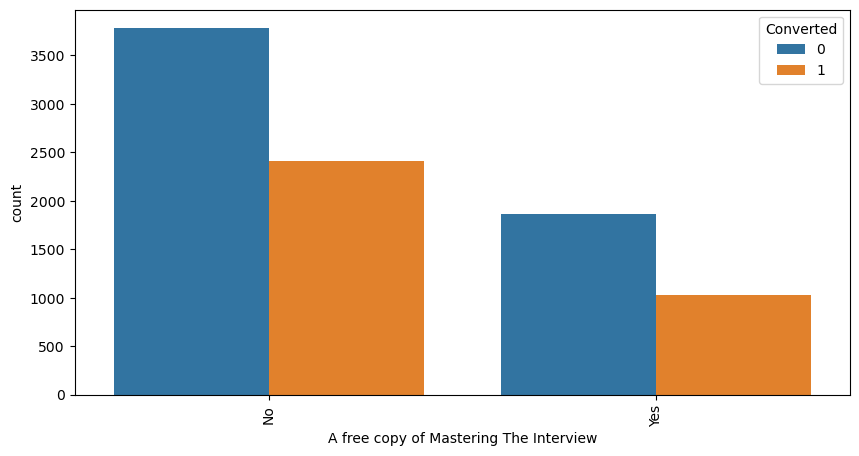

In [47]:
# Analysing `A free copy of Mastering The Interview` column
plt.figure(figsize=(10,5))
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

Providing `A free copy of Mastering The Interview` does not have an impact on Lead conversion as `No` has a higher lead conversion rate than `yes`

### 6. I agree to pay the amount through cheque column

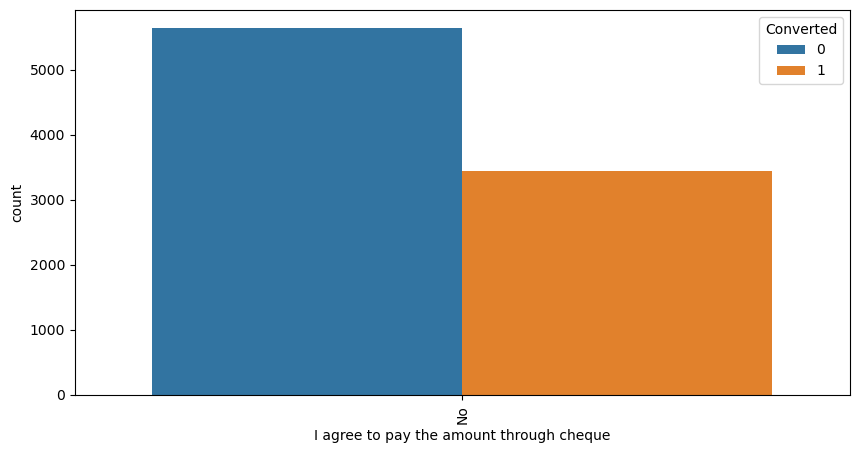

In [48]:
# Analysing `I agree to pay the amount through cheque` column
plt.figure(figsize=(10,5))
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()6

Since all the values are `No`. No Inferences can be drawn

### 7. City Column

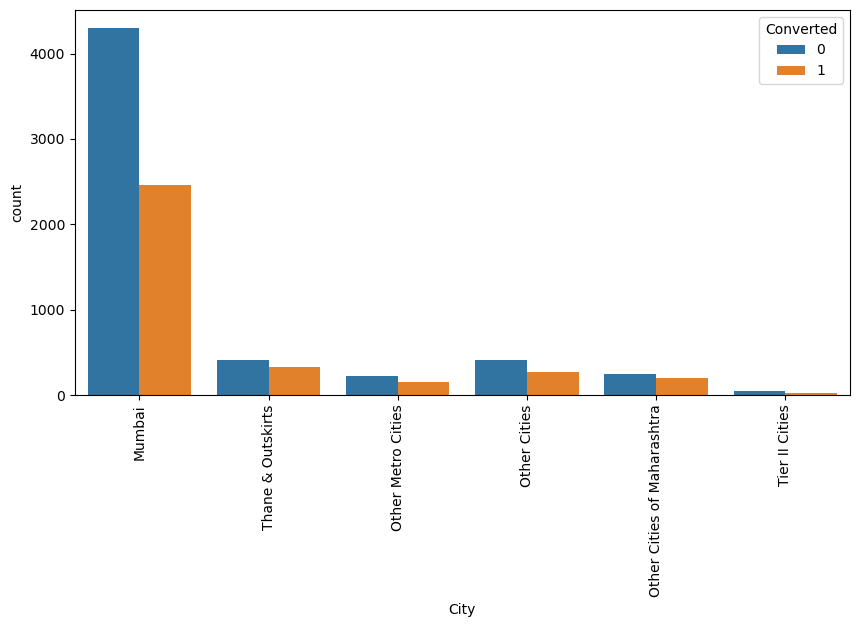

In [49]:
# Analysing `City` column
plt.figure(figsize=(10,5))
sns.countplot(x = "City", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

Mumbai has a higher lead conversion rate than the rest of the cities. 

### 8. Get updates on DM Content column

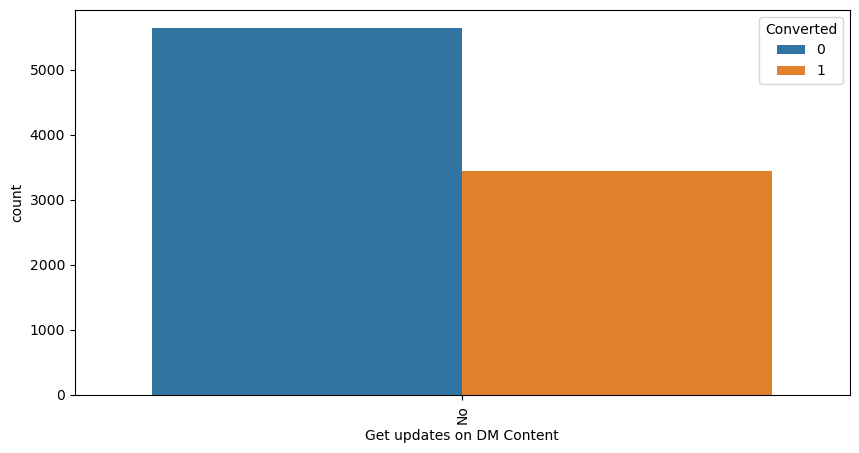

In [51]:
# Analysing Get updates on DM Content column
plt.figure(figsize=(10,5))
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

No inferences can be drawn

### 9. Update me on Supply Chain Content column

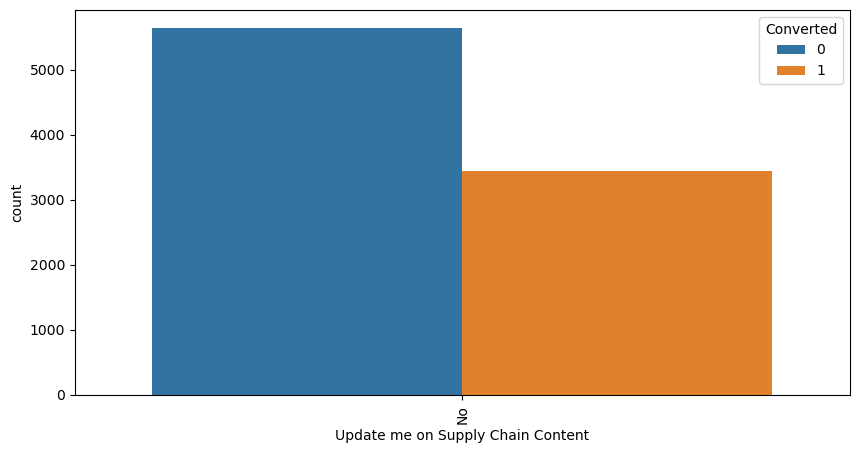

In [52]:
# Analysing Update me on Supply Chain Content column
plt.figure(figsize=(10,5))
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

No inferences can be made as all the responses are No

### 10. Receive More Updates About Our Courses column

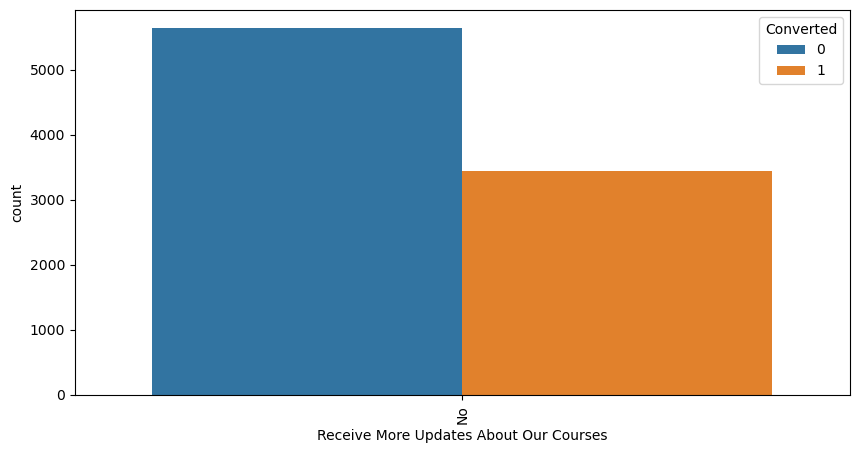

In [53]:

# Analysing Receive More Updates About Our Courses column
plt.figure(figsize=(10,5))
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

No inferences can be made

### 11. Update me on Through Recommendations column

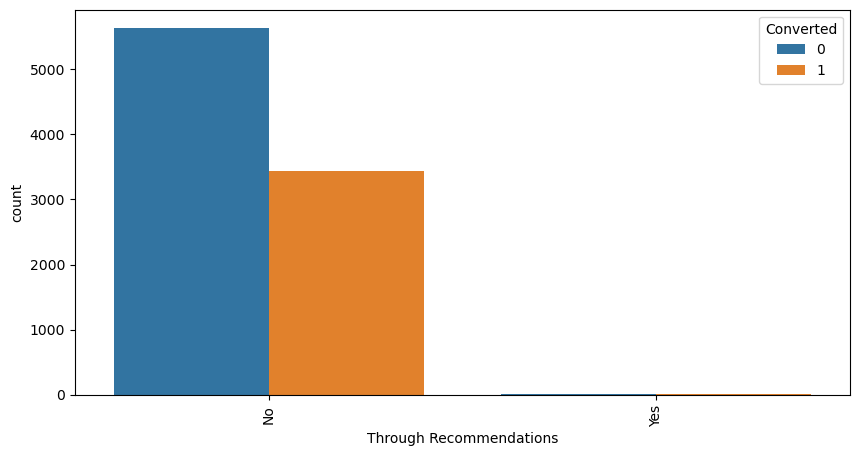

In [54]:
# Analysing Update me on Through Recommendations column
plt.figure(figsize=(10,5))
sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

No inferences can be made

### 12. Digital Advertisement column

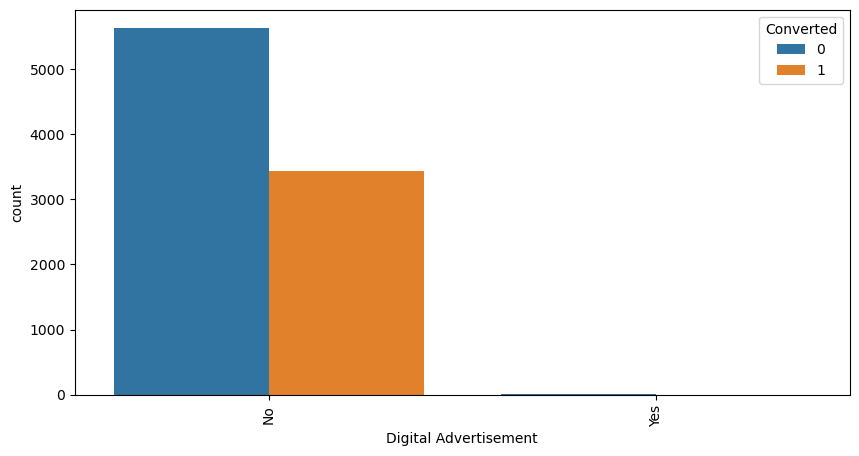

In [55]:
# Analysing Digital Advertisement column
plt.figure(figsize=(10,5))
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

No inferences can be made

### 13. Newspaper column

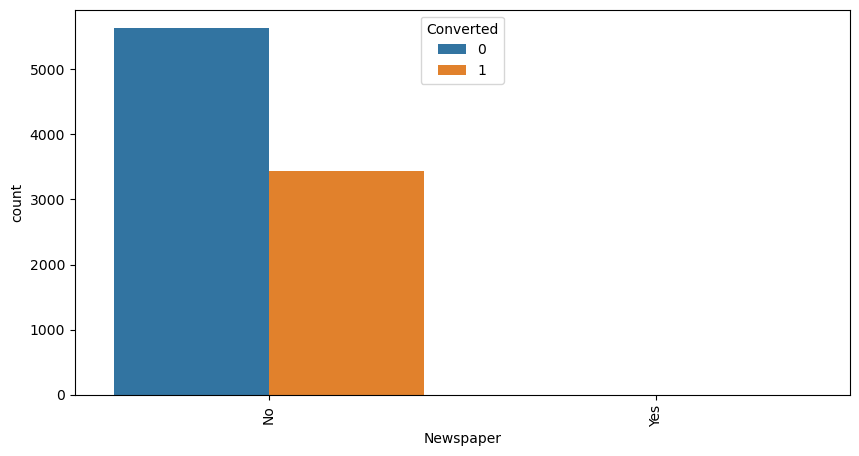

In [58]:
# Analysing Newspaper column
plt.figure(figsize=(10,5))
sns.countplot(x = "Newspaper", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

No inferences can be made

### 14. X Education Forums column

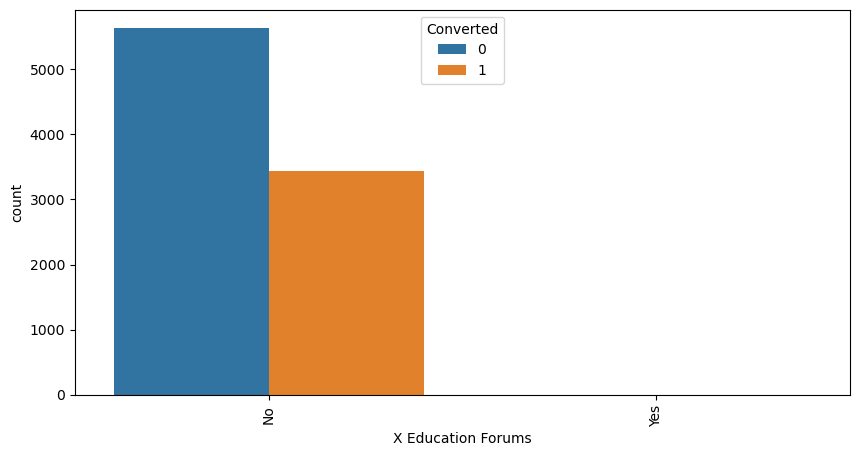

In [59]:
plt.figure(figsize=(10,5))
sns.countplot(x = "X Education Forums", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

No Inferences can be drawn

### 15. Newspaper Article column

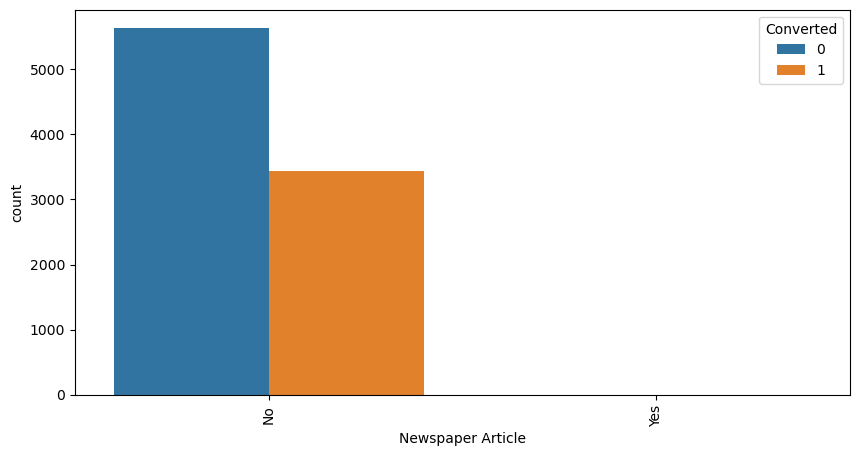

In [60]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Newspaper Article", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

No inferences can be drawn

### 16. Search column

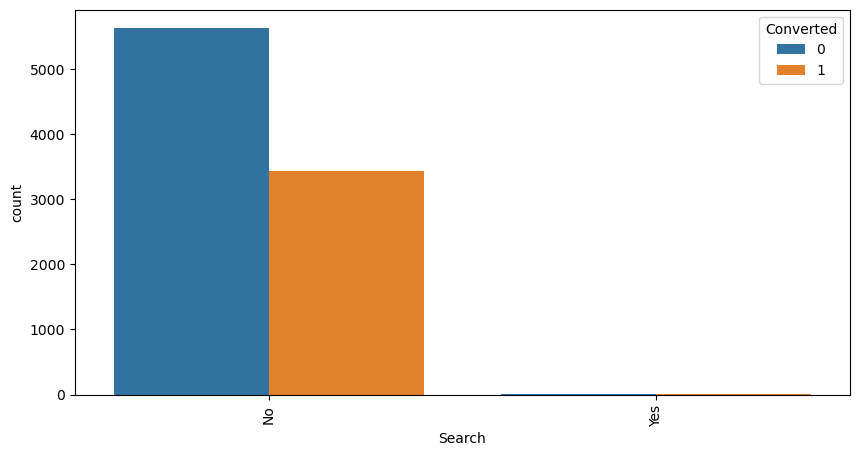

In [61]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Search", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

No inferences can be drawn

### 17. What is your current occupation Column

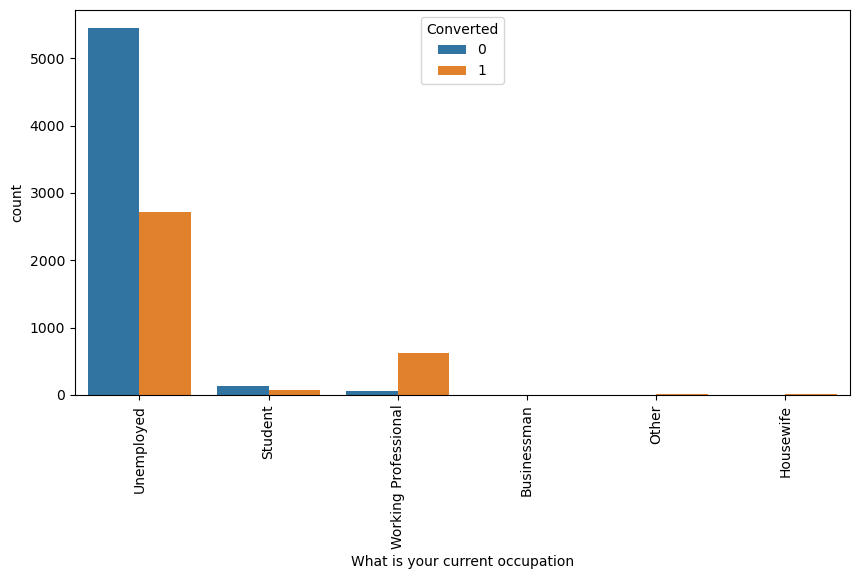

In [63]:
plt.figure(figsize=(10,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

Observations:
1. Unemployed people are highly likely to become a lead
2. Working professionals are more likely to convert into lead

### 18. Specialization column

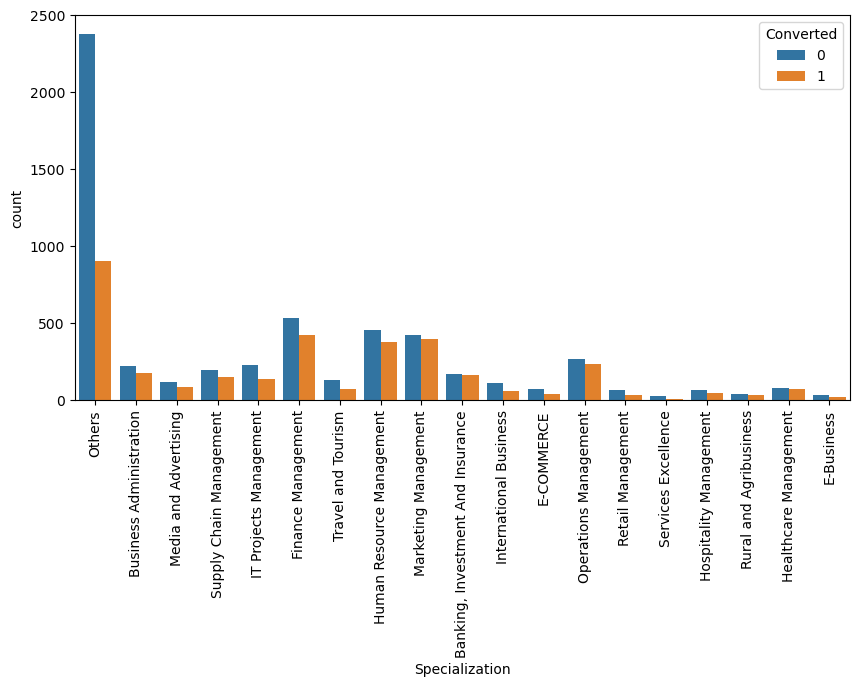

In [65]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Specialization", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

### 19. Country column

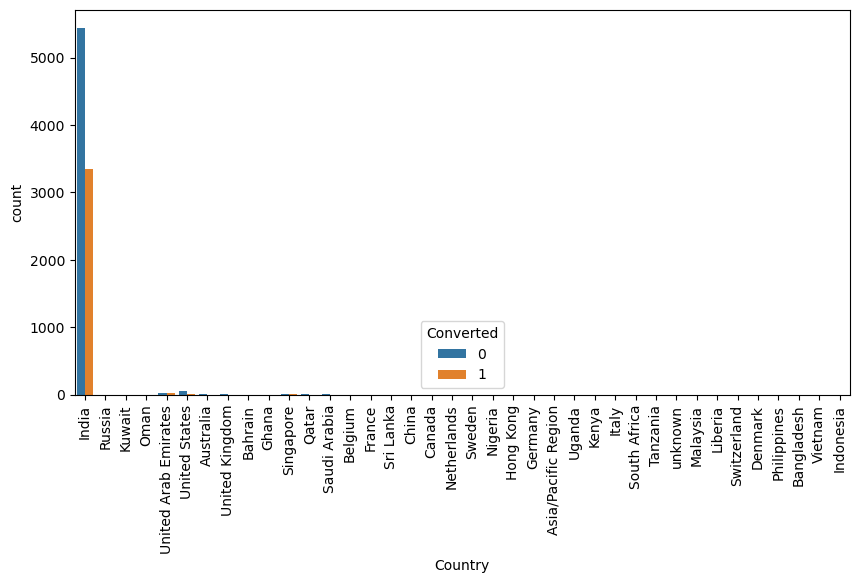

In [66]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Country", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

India has the maximum leads

### 20. Last Activity column

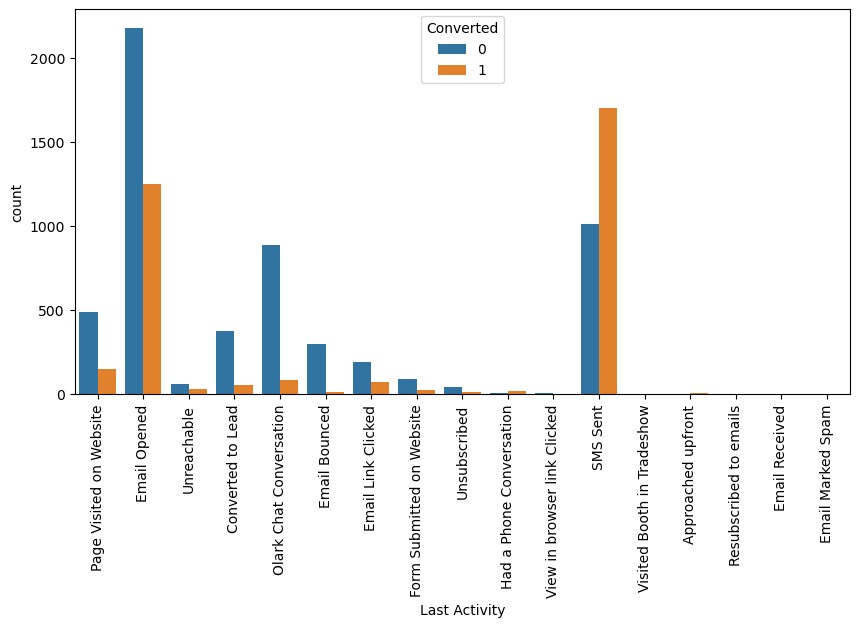

In [67]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

Observation:
1. There are high chances of lead conversion where the last activity was `SMS Sent`
2. `Email Opened` last activity has the second highest chances

### 21. Do Not Call column

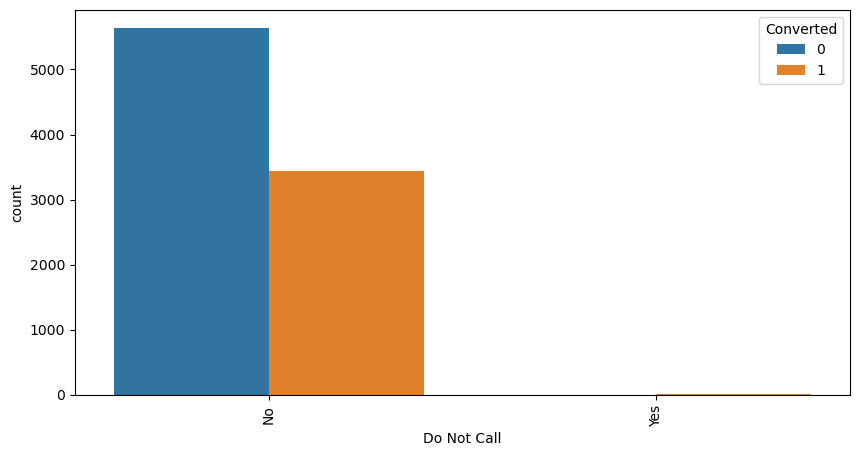

In [68]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

High chances of lead conversion if the answer is `No`

### 22. Do Not Email

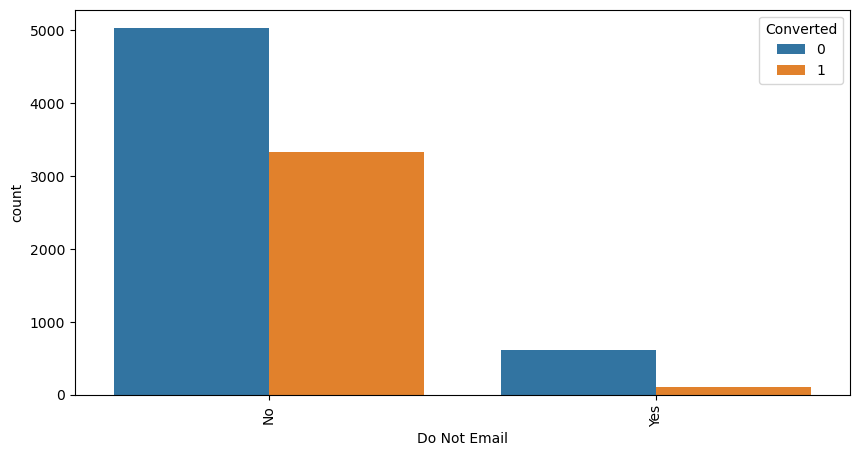

In [69]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

High chances of lead conversion if the answer is `No`

### 23. Last Notable Activity

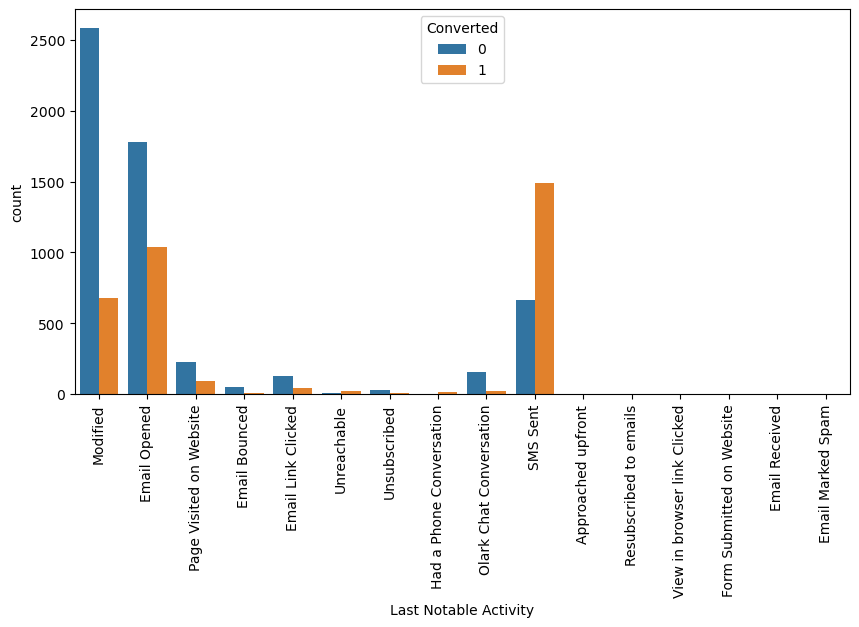

In [70]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

This column has similar inferences with the `Last Activity` column

### 24. Tags

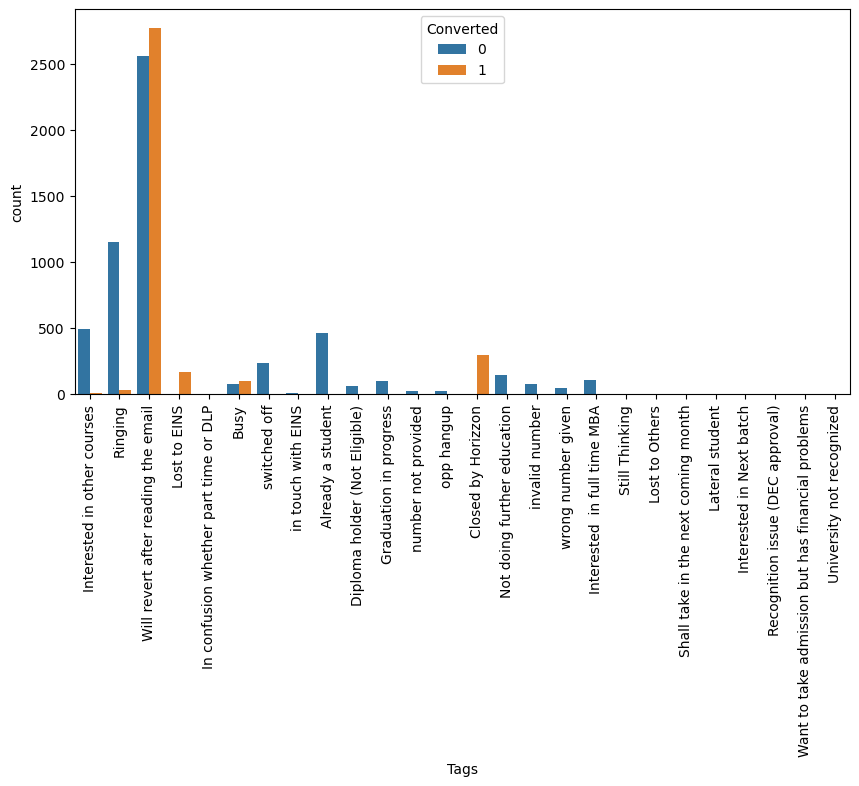

In [71]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Tags", hue = "Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

As this is the current status when the calls are made, we cannot add this column in the model creation.

### 25. TotalVisits

In [78]:
lead['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

<AxesSubplot:xlabel='TotalVisits'>

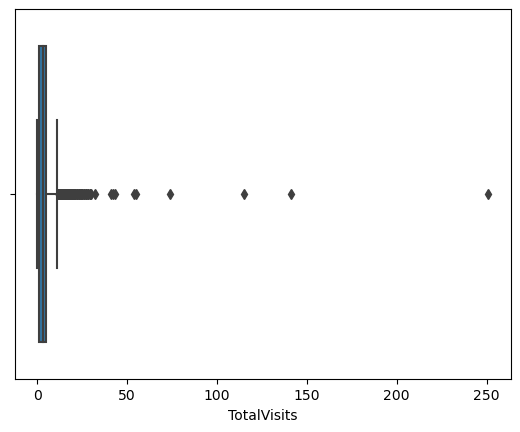

In [82]:
sns.boxplot(lead['TotalVisits'])

As there are many outliers, we can cap to 95 percentile

In [83]:
percentiles = lead['TotalVisits'].quantile([0.05,0.95]).values
lead['TotalVisits'][lead['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead['TotalVisits'][lead['TotalVisits'] >= percentiles[1]] = percentiles[1]

<AxesSubplot:xlabel='TotalVisits'>

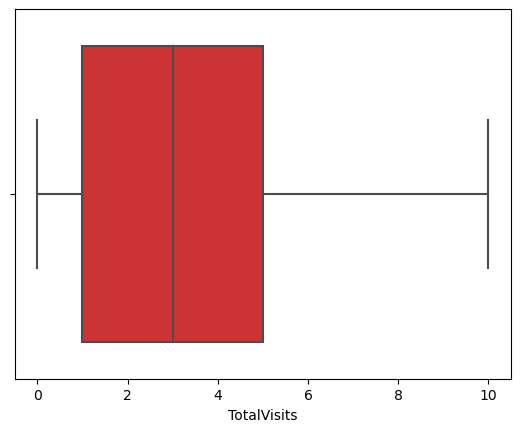

In [85]:
# Visualizing again
sns.boxplot(lead['TotalVisits'],orient='vert',palette='Set1')

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

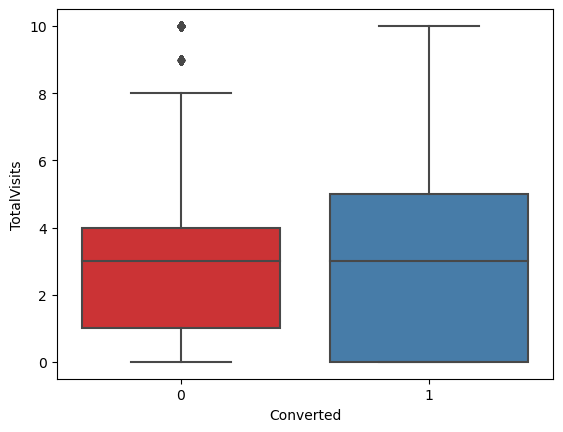

In [87]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead,palette='Set1')

High chances of lead conversion if the total number of visits are 0-5

### 26. Total Time Spent on Website

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

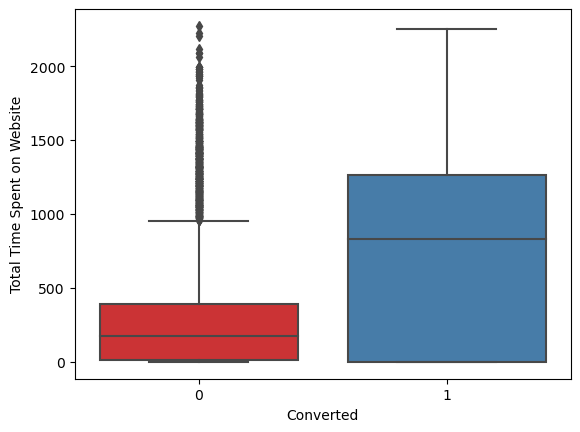

In [88]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead,palette='Set1')

Leads spending more time on the website are highly likely to get converted

### 27. Page Views Per Visit

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

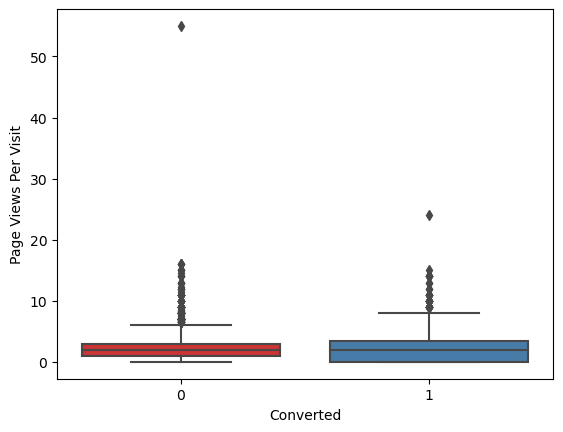

In [89]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead,palette='Set1')

As the medians for the converted and non converted leads are the same. Nothing specific can be said regarding this column.

## Data cleaning and Data pre-processing for modelling

As there are columns in the data set where no inferences can be made using them, we can remove those from the list

In [90]:
lead = lead.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

In [92]:
lead.shape


(9074, 14)

In [93]:
lead.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                

<AxesSubplot:>

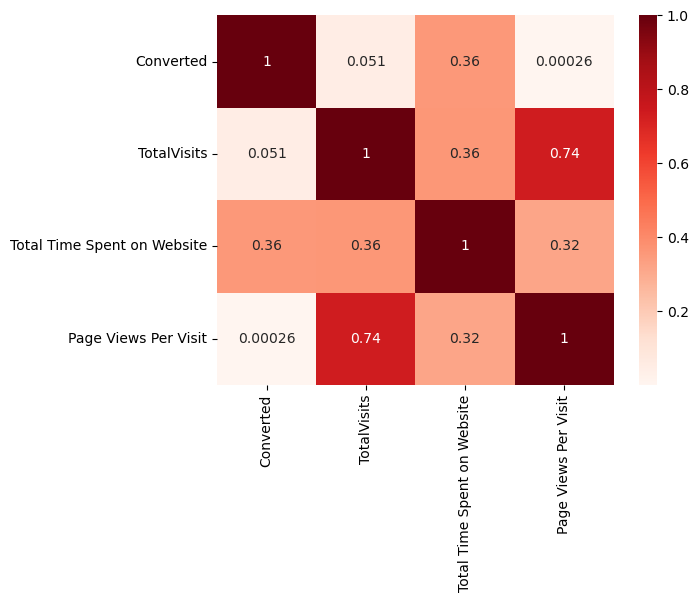

In [96]:
sns.heatmap(lead.corr(),annot = True,cmap='Reds')

#### Converting yes/no columns to 1/0

In [97]:
cols =  ['Do Not Email', 'Do Not Call']

def binary_conversion(x):
    return x.map({'Yes': 1, "No": 0})

lead[cols] = lead[cols].apply(binary_conversion)

#### Creating dummy variables

In [98]:
dummy_data = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [99]:
# Concatenating the dummy_data to the lead_data dataframe
lead = pd.concat([lead, dummy_data], axis=1)
lead.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [100]:
# Removing the columns for which dummies were created

In [101]:
lead = lead.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

In [103]:
lead.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [105]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = lead.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [106]:
# Putting target variable to y
y = lead['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [107]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [108]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.179666,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.179666,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.132538,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.179666,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.058552,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


#### Feature selection using RFE

In [110]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select= 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [111]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 10),
 ('TotalVisits', False, 31),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 32),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 21),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 47),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Olark Chat', False, 12),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Reference', False, 8),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 27),
 ('Last Activity_Email Marked Spam', False, 17),
 ('Last Activity_Email Opened', False, 43),
 ('Last Activity_Email Received', False, 44),
 ('Last Activity_Form Submitted on Website', False, 14),
 ('Last Activity_Had a Phone Conversation',

In [112]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

#### Model Building

In [113]:
import statsmodels.api as sm


In [114]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2610.3
Date:                Fri, 19 May 2023   Deviance:                       5220.5
Time:                        18:26:52   Pearson chi2:                 6.28e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4001
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.7505      0.131     13.363      0.000       1.494       2.007
Do Not Email                                            -1.5499      0.201     -7.728      0.000      -1.943      -1.157
Total Time Spent on Website                              0.9924      0.037     26.503      0.000       0.919       1.066
Lead Origin_Landing Page Submission                     -1.3155      0.127    -10.333      0.000      -1.565      -1.066
Lead Origin_Lead Add Form                                2.6767      0.227     11.774      0.000       2.231       3.122
Lead Source_Direct Traffic                              -0.3613      0.091     -3.950      0.000      -0.541      -0.182
Lead Source_Organic Search                              -0.4014      0.109     -3.691      0.000      -0.614      -0.188
Lead Source_Referral Sites                              -0.7305      0.331     -2.206      0.027      -1.379      -0.081
Lead Source_Welingak Website                             2.6054      0.758      3.437      0.001       1.120       4.091
Last Activity_Converted to Lead                         -1.0874      0.226     -4.819      0.000      -1.530      -0.645
Last Activity_Email Bounced                             -1.1792      0.431     -2.736      0.006      -2.024      -0.335
Last Activity_Had a Phone Conversation                   1.6815      0.783      2.148      0.032       0.147       3.216
Last Activity_Olark Chat Conversation                   -1.1585      0.196     -5.901      0.000      -1.543      -0.774
Specialization_Others                                   -1.0362      0.124     -8.381      0.000      -1.278      -0.794
What is your current occupation_Housewife               22.7967   1.52e+04      0.001      0.999   -2.98e+04    2.99e+04
What is your current occupation_Working Professional     2.6151      0.194     13.489      0.000       2.235       2.995
Last Notable Activity_Email Link Clicked                -1.7728      0.258     -6.864      0.000      -2.279      -1.267
Last Notable Activity_Email Opened                      -1.4429      0.088    -16.357      0.000      -1.616      -1.270
Last Notable Activity_Modified                          -1.7823      0.100    -17.739      0.000      -1.979      -1.585
Last Notable Activity_Olark Chat Conversation           -1.4551      0.376     -3.875      0.000      -2.191      -0.719
Last Notable Activity_Page Visited on Website           -1.7352      0.199     -8.732      0.000      -2.125      -1.346
========================================================================================================================
"""

p-value of `What is your current occupation_Housewife` is very high, so we can remove it.

In [115]:
# Dropping the column 'What is your current occupation_Housewife'
col1 = cols.drop('What is your current occupation_Housewife')

##### Model 2

In [116]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2614.6
Date:                Fri, 19 May 2023   Deviance:                       5229.2
Time:                        18:28:33   Pearson chi2:                 6.29e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3993
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.7503      0.131     13.368      0.000       1.494       2.007
Do Not Email                                            -1.5512      0.201     -7.734      0.000      -1.944      -1.158
Total Time Spent on Website                              0.9916      0.037     26.513      0.000       0.918       1.065
Lead Origin_Landing Page Submission                     -1.3156      0.127    -10.344      0.000      -1.565      -1.066
Lead Origin_Lead Add Form                                2.6930      0.227     11.858      0.000       2.248       3.138
Lead Source_Direct Traffic                              -0.3605      0.091     -3.945      0.000      -0.540      -0.181
Lead Source_Organic Search                              -0.3919      0.108     -3.612      0.000      -0.605      -0.179
Lead Source_Referral Sites                              -0.7291      0.331     -2.203      0.028      -1.378      -0.080
Lead Source_Welingak Website                             2.5910      0.758      3.418      0.001       1.105       4.077
Last Activity_Converted to Lead                         -1.0875      0.226     -4.821      0.000      -1.530      -0.645
Last Activity_Email Bounced                             -1.1779      0.431     -2.734      0.006      -2.022      -0.333
Last Activity_Had a Phone Conversation                   1.6792      0.783      2.145      0.032       0.145       3.214
Last Activity_Olark Chat Conversation                   -1.1563      0.196     -5.890      0.000      -1.541      -0.772
Specialization_Others                                   -1.0413      0.124     -8.429      0.000      -1.283      -0.799
What is your current occupation_Working Professional     2.6103      0.194     13.462      0.000       2.230       2.990
Last Notable Activity_Email Link Clicked                -1.7639      0.257     -6.862      0.000      -2.268      -1.260
Last Notable Activity_Email Opened                      -1.4356      0.088    -16.290      0.000      -1.608      -1.263
Last Notable Activity_Modified                          -1.7813      0.100    -17.733      0.000      -1.978      -1.584
Last Notable Activity_Olark Chat Conversation           -1.4536      0.376     -3.871      0.000      -2.190      -0.718
Last Notable Activity_Page Visited on Website           -1.7344      0.199     -8.729      0.000      -2.124      -1.345
========================================================================================================================
"""

Lets remove Last Activity_Had a Phone Conversation, to reduce the number of features

In [118]:
col1 = col1.drop('Last Activity_Had a Phone Conversation')

#### Model 3

In [119]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2617.4
Date:                Fri, 19 May 2023   Deviance:                       5234.9
Time:                        18:41:03   Pearson chi2:                 6.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3988
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.7602      0.131     13.465      0.000       1.504       2.016
Do Not Email                                            -1.5556      0.201     -7.748      0.000      -1.949      -1.162
Total Time Spent on Website                              0.9916      0.037     26.525      0.000       0.918       1.065
Lead Origin_Landing Page Submission                     -1.3152      0.127    -10.357      0.000      -1.564      -1.066
Lead Origin_Lead Add Form                                2.6888      0.227     11.840      0.000       2.244       3.134
Lead Source_Direct Traffic                              -0.3647      0.091     -3.995      0.000      -0.544      -0.186
Lead Source_Organic Search                              -0.3848      0.108     -3.552      0.000      -0.597      -0.172
Lead Source_Referral Sites                              -0.6985      0.327     -2.137      0.033      -1.339      -0.058
Lead Source_Welingak Website                             2.5923      0.758      3.420      0.001       1.107       4.078
Last Activity_Converted to Lead                         -1.0959      0.225     -4.860      0.000      -1.538      -0.654
Last Activity_Email Bounced                             -1.1821      0.431     -2.743      0.006      -2.027      -0.338
Last Activity_Olark Chat Conversation                   -1.1649      0.196     -5.936      0.000      -1.550      -0.780
Specialization_Others                                   -1.0436      0.123     -8.455      0.000      -1.286      -0.802
What is your current occupation_Working Professional     2.6068      0.194     13.443      0.000       2.227       2.987
Last Notable Activity_Email Link Clicked                -1.7730      0.257     -6.899      0.000      -2.277      -1.269
Last Notable Activity_Email Opened                      -1.4448      0.088    -16.411      0.000      -1.617      -1.272
Last Notable Activity_Modified                          -1.7818      0.100    -17.760      0.000      -1.978      -1.585
Last Notable Activity_Olark Chat Conversation           -1.4533      0.376     -3.870      0.000      -2.189      -0.717
Last Notable Activity_Page Visited on Website           -1.7438      0.199     -8.777      0.000      -2.133      -1.354
========================================================================================================================
"""

Lets check VIF

In [120]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.41
15,Last Notable Activity_Modified,2.71
4,Lead Source_Direct Traffic,2.14
11,Specialization_Others,2.14
10,Last Activity_Olark Chat Conversation,1.94
0,Do Not Email,1.86
14,Last Notable Activity_Email Opened,1.85
9,Last Activity_Email Bounced,1.76
3,Lead Origin_Lead Add Form,1.54
7,Lead Source_Welingak Website,1.37


#### As the p value and VIF values are within limit, lets finalise the model with these 18 featues

##### Making prediction on the train set

In [121]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.178960
1012    0.163869
9226    0.124945
4750    0.846805
7987    0.574212
1281    0.794787
2880    0.133116
4971    0.974617
7536    0.794594
1248    0.535137
dtype: float64

In [122]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.17896011, 0.16386865, 0.12494534, 0.84680498, 0.57421202,
       0.7947866 , 0.13311575, 0.97461716, 0.79459417, 0.53513734])

In [123]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.178960,3009
1,0,0.163869,1012
2,0,0.124945,9226
3,1,0.846805,4750
4,1,0.574212,7987


In [124]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.178960,3009,0
1,0,0.163869,1012,0
2,0,0.124945,9226,0
3,1,0.846805,4750,1
4,1,0.574212,7987,1


#### Creating Metrics

In [125]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3465  440]
 [ 799 1647]]


In [126]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8049126121870571


In [127]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [128]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.6733442354865086


In [129]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8873239436619719


In [130]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.11267605633802817


In [131]:
# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7891710589362722


In [132]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8126172607879925


The Specificity is approx 88% but Sensitivity is 67% which is because out cut off is 0.5.
We can change that using the ROC curve

#### Plotting ROC Curve

In [133]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [134]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

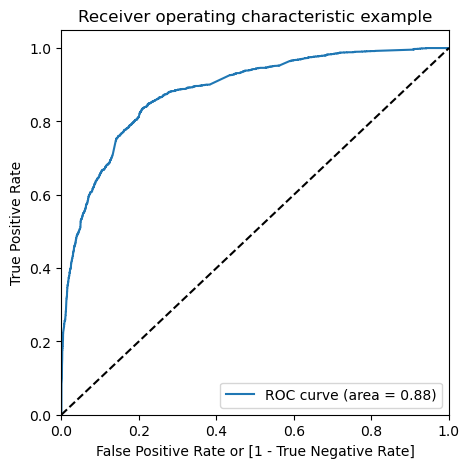

In [135]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

Since we have a high area 88%. Out model is good

#### Finding optimal cut off

In [136]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.178960,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.163869,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.124945,9226,0,1,1,0,0,0,0,0,0,0,0
3,1,0.846805,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.574212,7987,1,1,1,1,1,1,1,0,0,0,0


In [137]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.577389  0.979150  0.325736
0.2   0.2  0.762085  0.888389  0.682971
0.3   0.3  0.798299  0.855683  0.762356
0.4   0.4  0.809951  0.790270  0.822279
0.5   0.5  0.804913  0.673344  0.887324
0.6   0.6  0.801606  0.599346  0.928297
0.7   0.7  0.787278  0.527392  0.950064
0.8   0.8  0.763187  0.431316  0.971063
0.9   0.9  0.715006  0.278005  0.988732


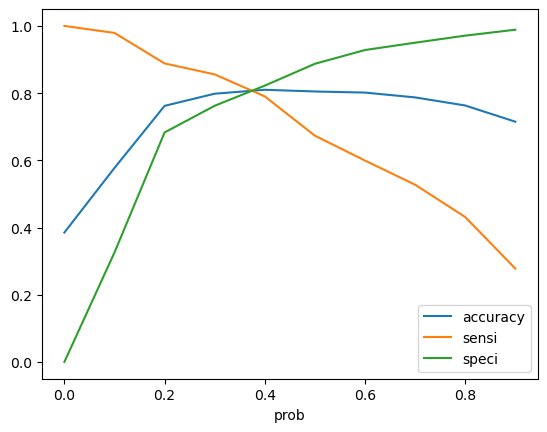

In [138]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

The optimal cut off according to the graph is between 0.3 and 0.4 so lets take 0.35 as the optimal cut-off

In [139]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.178960,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.163869,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.124945,9226,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.846805,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.574212,7987,1,1,1,1,1,1,1,0,0,0,0,1


In [140]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.178960,3009,0,1,1,0,0,0,0,0,0,0,0,0,18
1,0,0.163869,1012,0,1,1,0,0,0,0,0,0,0,0,0,16
2,0,0.124945,9226,0,1,1,0,0,0,0,0,0,0,0,0,12
3,1,0.846805,4750,1,1,1,1,1,1,1,1,1,1,0,1,85
4,1,0.574212,7987,1,1,1,1,1,1,1,0,0,0,0,1,57


### Model Evaluation

In [141]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8079042670445599


In [142]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3099,  806],
       [ 414, 2032]])

In [143]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [144]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.830744071954211


In [145]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7935979513444302


In [146]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.20640204865556977


In [147]:
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7159971811134602


In [148]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8821520068317678


### Precision and Recall

In [149]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3465,  440],
       [ 799, 1647]])

In [150]:
# Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.6733442354865086


In [151]:
from sklearn.metrics import precision_score, recall_score
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))


Precision : 0.7891710589362722


In [152]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))


Recall : 0.6733442354865086


### Precision and Recall Tradeoff

In [153]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [154]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

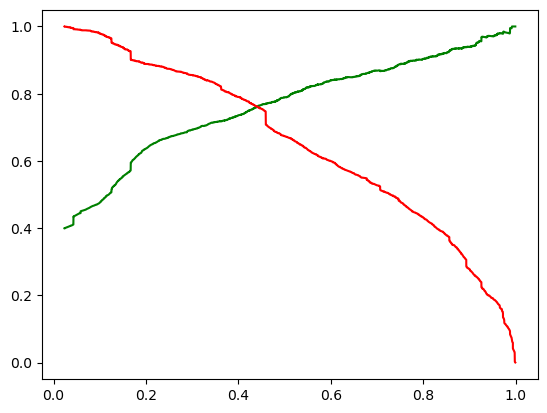

In [155]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making Predictions

In [156]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [157]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3271,0,-0.600595,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1490,0,1.887326,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
7936,0,-0.752879,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4216,0,-0.888650,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3830,0,-0.587751,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [158]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.210189
1490    0.957452
7936    0.186216
4216    0.856434
3830    0.122664
1800    0.703507
6507    0.449808
4821    0.267975
4223    0.925820
4714    0.124945
dtype: float64

In [159]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [160]:
# Let's see the head
y_pred_1.head()

,0
3271,0.210189
1490,0.957452
7936,0.186216
4216,0.856434
3830,0.122664


In [161]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [162]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [163]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [164]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [165]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.210189
1,1,1490,0.957452
2,0,7936,0.186216
3,1,4216,0.856434
4,0,3830,0.122664


In [166]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})


In [167]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [168]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.210189
1,1490,1,0.957452
2,7936,0,0.186216
3,4216,1,0.856434
4,3830,0,0.122664


In [169]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)


In [170]:
y_pred_final.head()


,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.210189,0
1,1490,1,0.957452,1
2,7936,0,0.186216,0
3,4216,1,0.856434,1
4,3830,0,0.122664,0


In [171]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8024237972824091


In [172]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1384,  350],
       [ 188,  801]])

In [173]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [174]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.8099089989888777


In [175]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.798154555940023


#### Assigning Lead score to test data

In [176]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.210189,0,21
1,1490,1,0.957452,1,96
2,7936,0,0.186216,0,19
3,4216,1,0.856434,1,86
4,3830,0,0.122664,0,12


#### Observations:
After running the model on the Test Data , we obtain:

- Accuracy : 80.2 %
- Sensitivity : 80.9 %
- Specificity : 79.8 %




#### Results :
1) Comparing the values obtained for Train & Test:
###### Train Data:

- Accuracy : 80.7 %
- Sensitivity : 83 %
- Specificity : 79.3 %
###### Test Data:

- Accuracy : 80.2 %
- Sensitivity : 80.9 %
- Specificity : 79.8 %

##### Finding the leads that can be contacted

In [177]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
1,1490,1,0.957452,1,96
3,4216,1,0.856434,1,86
8,4223,1,0.925820,1,93
16,1946,1,0.871084,1,87
21,2461,1,0.994039,1,99
...,...,...,...,...,...
2686,8052,1,0.997923,1,100
2694,1566,1,0.951823,1,95
2699,6461,1,0.971722,1,97
2703,5741,1,0.890814,1,89


In [178]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([1490, 4216, 4223, 1946, 2461, 5822, 2684, 2010, 4062, 7696, 9049,
       1518, 4543, 4830, 4365, 3542, 7347, 2504, 7674, 8596, 4003, 4963,
       6947, 4807,  446,  789, 5805, 4478, 3758, 1561,  737, 9034, 6423,
       8286, 7174, 4461, 1436, 7552, 3932, 4080, 1475, 5785, 1867, 2860,
       7253, 4297, 5490, 1995, 6532, 4498, 5797, 8687, 7653, 4149,   76,
       6743, 3703, 3307, 3976, 5769, 1051, 1663, 3288, 8959, 7521, 8282,
       8213, 9063, 5292, 6913, 6015, 1481,  785, 3265, 3285, 7433, 2460,
       3858, 3810, 2009, 8106,  373, 3055, 7417, 4179, 8076, 8568, 7268,
       6784, 6754, 2960, 7753, 3983,  802, 8745, 4455, 4717,  505, 6094,
       4992, 7036, 2680, 7065,  112, 6149, 7175, 1675, 6999, 5932, 5826,
       8492, 6499, 2481, 3439, 4612, 7129, 4793, 1557, 4837, 2495,  822,
       2378, 5075, 7699, 5638, 2342, 8077, 2727,  720, 7489, 2961, 1542,
       5656, 2630, 8205, 6332, 8461, 2427, 5087,  174, 2674, 8065, 2095,
       1568, 8597, 4865, 4708, 6066, 6538, 5700, 13

### Finding Important Features

In [179]:
res.params.sort_values(ascending=False)

Lead Origin_Lead Add Form                               2.688760
What is your current occupation_Working Professional    2.606756
Lead Source_Welingak Website                            2.592299
const                                                   1.760204
Total Time Spent on Website                             0.991559
Lead Source_Direct Traffic                             -0.364692
Lead Source_Organic Search                             -0.384839
Lead Source_Referral Sites                             -0.698451
Specialization_Others                                  -1.043635
Last Activity_Converted to Lead                        -1.095930
Last Activity_Olark Chat Conversation                  -1.164906
Last Activity_Email Bounced                            -1.182122
Lead Origin_Landing Page Submission                    -1.315186
Last Notable Activity_Email Opened                     -1.444833
Last Notable Activity_Olark Chat Conversation          -1.453328
Do Not Email             

### Recommendations:

- The company should make calls to Working professionals
- The company should make calls where the lead source is Welingak Website
- The company should make calls where the lead origin is Lead Add Form
- The company should make calls to leads that have spent time on the website

#### The company should not make calls to:

- Leads that have lead source as direct traffic, organic search or referral sites
- Leads whose Last activity is converted to lead, Olark Chat Conversation, Email Bounced
- Leads whose lead origin is Landing page submission
- Leads whose last notable activity is Email opened, Olark Chat Conversation, Page Visited on Website, Email link clicked or modified
- Leads with Do Not Email